<a href="https://colab.research.google.com/github/kcanmersin/Google-Colab-Notebooks/blob/main/fashion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import random

In [2]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
label_names = [    'T-shirt/top',    'Trouser',    'Pullover',    'Dress',    'Coat',    'Sandal',    'Shirt',    'Sneaker',    'Bag',    'Ankle boot']

In [4]:
def show_img(data, labels, label_names):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    for i in range(2):
        for j in range(2):
            rand = random.randint(0, len(data) - 1)
            axs[i, j].imshow(data[rand])
            axs[i, j].set_title(label_names[labels[rand]])
            axs[i, j].axis('off')

    plt.show()


In [5]:
train_labels[0]

9

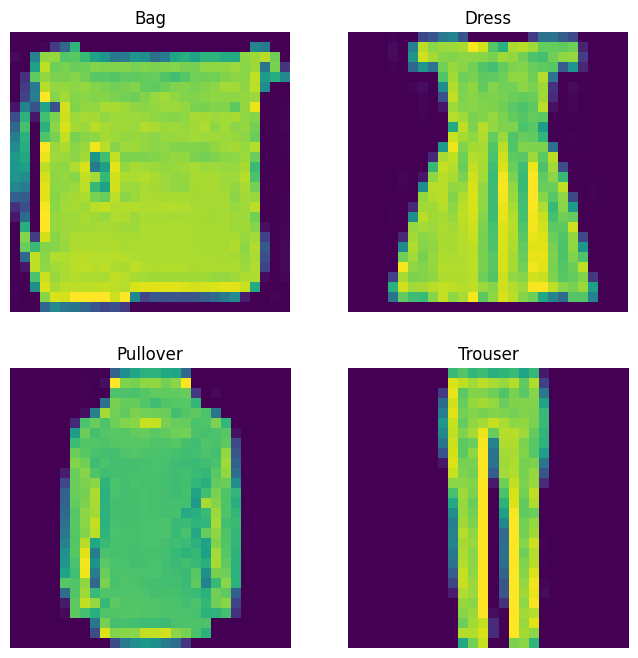

In [6]:
show_img(train_data,train_labels,label_names)


In [8]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                      train_labels,
                      epochs=10,
                      validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.2707 - accuracy: 0.5132 - val_loss: 0.9215 - val_accuracy: 0.6894
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7776 - accuracy: 0.7322 - val_loss: 0.7449 - val_accuracy: 0.7427
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6738 - accuracy: 0.7616 - val_loss: 0.6729 - val_accuracy: 0.7646
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6285 - accuracy: 0.7732 - val_loss: 0.6394 - val_accuracy: 0.7693
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5989 - accuracy: 0.7830 - val_loss: 0.6151 - val_accuracy: 0.7807
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5729 - accuracy: 0.7933 - val_loss: 0.6000 - val_accuracy: 0.7884
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5510 - accuracy: 0.8044 - val_loss: 0.5925 - val_accurac

<Axes: >

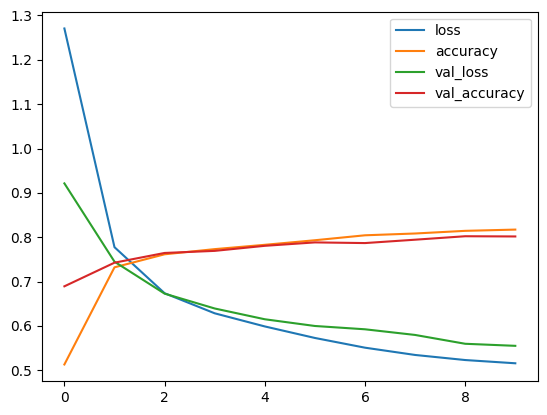

In [13]:
pd.DataFrame(history_1.history).plot()

In [15]:
y_probs = model_1.predict(test_data)
y_preds = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [27]:
def plot_predict(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 19ms/step


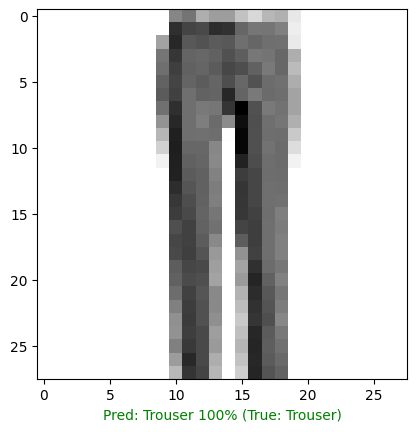

In [28]:
plot_predict(model=model_1,
                  images=test_data,
                  true_labels=test_labels,
                  classes=label_names)
